# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
record = 1
set = 1

lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind= []
country = []
date = []
cities_trim = []

print("Beginning Data Retrival")
print("----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {record} of Set {set} | {city}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_trim.append(city)
    except:
        print("City " + "\033[1m" + "not" + "\033[0m" + " found. Skipping...")
        pass
    record += 1
    if record == 51:
        set += 1
        record = 1

Beginning Data Retrival
----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | tigil
Processing Record 6 of Set 1 | kjollefjord
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | yerbogachen
Processing Record 12 of Set 1 | lichinga
Processing Record 13 of Set 1 | mandalgovi
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | pleasant point
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hambantota
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | dunedin
Processing Record 22 of Set 1 | porgera
Processing Record 23 of Set 1 | kapa

Processing Record 34 of Set 4 | hamilton
Processing Record 35 of Set 4 | vao
Processing Record 36 of Set 4 | inhambane
Processing Record 37 of Set 4 | tunceli
Processing Record 38 of Set 4 | talaya
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | san jose
Processing Record 41 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 42 of Set 4 | bud
Processing Record 43 of Set 4 | pangnirtung
Processing Record 44 of Set 4 | myitkyina
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | nyurba
Processing Record 47 of Set 4 | kaeo
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | ugoofaaru
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | likasi
Processing Record 6 of Set 5 | kysyl-syr
Processing Record 7 of Set 5 | nikolskoye

Processing Record 18 of Set 8 | timra
Processing Record 19 of Set 8 | toronto
Processing Record 20 of Set 8 | dalby
Processing Record 21 of Set 8 | meyungs
City not found. Skipping...
Processing Record 22 of Set 8 | orumiyeh
Processing Record 23 of Set 8 | malpe
Processing Record 24 of Set 8 | jackson
Processing Record 25 of Set 8 | marang
Processing Record 26 of Set 8 | makat
Processing Record 27 of Set 8 | barinas
Processing Record 28 of Set 8 | ermelo
Processing Record 29 of Set 8 | thohoyandou
Processing Record 30 of Set 8 | kidal
Processing Record 31 of Set 8 | choucheng
City not found. Skipping...
Processing Record 32 of Set 8 | krasnyy yar
Processing Record 33 of Set 8 | eyl
Processing Record 34 of Set 8 | leningradskiy
Processing Record 35 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 36 of Set 8 | bocas del toro
Processing Record 37 of Set 8 | salym
Processing Record 38 of Set 8 | fonseca
Processing Record 39 of Set 8 | urumqi
Processing Record 40 of Set 8

Processing Record 3 of Set 12 | bataipora
Processing Record 4 of Set 12 | krasnyy chikoy
Processing Record 5 of Set 12 | tirlyanskiy
Processing Record 6 of Set 12 | mezen
Processing Record 7 of Set 12 | rabak
Processing Record 8 of Set 12 | barawe
City not found. Skipping...
Processing Record 9 of Set 12 | foam lake
Processing Record 10 of Set 12 | arlit
Processing Record 11 of Set 12 | bargal
City not found. Skipping...
Processing Record 12 of Set 12 | west odessa
Processing Record 13 of Set 12 | minas
Processing Record 14 of Set 12 | port hardy
Processing Record 15 of Set 12 | bathsheba
Processing Record 16 of Set 12 | walvis bay
Processing Record 17 of Set 12 | elat
Processing Record 18 of Set 12 | shimoda
Processing Record 19 of Set 12 | pringsewu
Processing Record 20 of Set 12 | luderitz
Processing Record 21 of Set 12 | yuryevets
Processing Record 22 of Set 12 | afsin
Processing Record 23 of Set 12 | atbasar
Processing Record 24 of Set 12 | palmer
Processing Record 25 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
weather_dict = {
    "City": cities_trim,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("output_data/WeatherPy.csv", encoding = "utf-8", index = False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,80.60,88,40,10.29,TO,1609967314
1,ushuaia,-54.8000,-68.3000,62.60,45,75,13.87,AR,1609967202
2,east london,-33.0153,27.9116,70.36,77,13,6.58,ZA,1609967172
3,porto novo,6.4965,2.6036,84.20,83,40,14.99,BJ,1609967315
4,tigil,57.8000,158.6667,-13.04,87,97,1.34,RU,1609967315


In [60]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.295821,21.577687,48.043886,75.661485,56.112263,8.117565,1.609967e+09
std,33.782556,90.523356,33.216305,17.650179,39.994673,6.087913,7.389615e+01
min,-54.800000,-175.200000,-35.840000,13.000000,0.000000,0.040000,1.609967e+09
25%,-9.547050,-57.753550,26.015000,68.000000,10.000000,3.610000,1.609967e+09
50%,25.286700,29.183300,60.010000,79.000000,72.000000,6.930000,1.609967e+09
75%,49.716850,99.557300,76.075000,88.000000,97.000000,11.410000,1.609967e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,39.150000,1.609967e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
# Max result for humidity in describe table in last step confirms that no cities have humidity > 100%. Skipping this part.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.295821,21.577687,48.043886,75.661485,56.112263,8.117565,1.609967e+09
std,33.782556,90.523356,33.216305,17.650179,39.994673,6.087913,7.389615e+01
min,-54.800000,-175.200000,-35.840000,13.000000,0.000000,0.040000,1.609967e+09
25%,-9.547050,-57.753550,26.015000,68.000000,10.000000,3.610000,1.609967e+09
50%,25.286700,29.183300,60.010000,79.000000,72.000000,6.930000,1.609967e+09
75%,49.716850,99.557300,76.075000,88.000000,97.000000,11.410000,1.609967e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,39.150000,1.609967e+09


In [62]:
print("No cities with humidity above 100%")


No cities with humidity above 100%


In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.sort_values(['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])

weather_trim = weather_df.drop_duplicates(['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country'], keep = 'first')
weather_trim.to_csv("output_data/WeatherPy_trim.csv", encoding = "utf-8", index = False)
weather_trim.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
543,zhigansk,66.7697,123.3711,-35.84,82,100,18.57,RU,1609967452
304,ust-nera,64.5667,143.2000,-28.23,75,50,4.79,RU,1609967389
170,talaya,61.3833,152.7500,-28.17,82,100,1.77,RU,1609967355
387,chegdomyn,51.1167,133.0167,-26.66,84,93,0.85,RU,1609967411
440,taksimo,56.3444,114.8794,-26.00,78,93,1.43,RU,1609967426


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

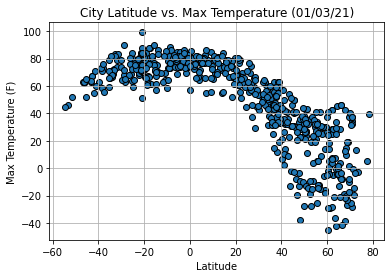

In [25]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (01/03/21)')
plt.grid(axis='both')
plt.savefig("output_data/Lat_v_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

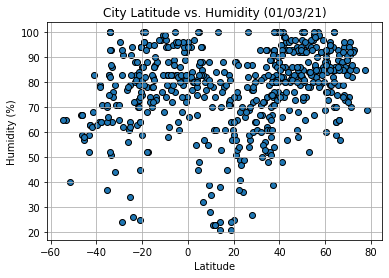

In [26]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/03/21)')
plt.grid(axis='both')
plt.savefig("output_data/Lat_v_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

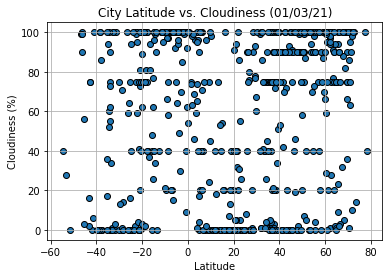

In [27]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (01/03/21)')
plt.grid(axis='both')
plt.savefig("output_data/Lat_v_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

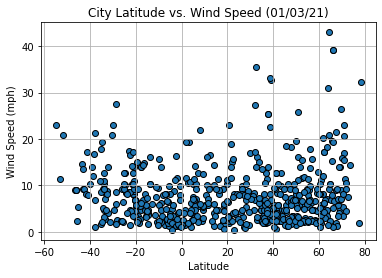

In [28]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (01/03/21)')
plt.grid(axis='both')
plt.savefig("output_data/Lat_v_WindSpeed.png")
plt.show()

## Linear Regression

In [31]:
north_weather = pd.DataFrame(weather_df.loc[weather_df['Lat'] >= 0, :])
south_weather = pd.DataFrame(weather_df.loc[weather_df['Lat'] < 0, :])
south_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,rikitea,-23.12,-134.97,77.92,80,2,17.38,PF,1609724377
2,trairi,-3.28,-39.27,79.05,82,30,8.84,BR,1609724773
4,tuatapere,-46.13,167.68,63.00,67,90,8.99,NZ,1609724377
7,east london,-33.02,27.91,72.36,86,1,8.05,ZA,1609724378
9,port elizabeth,-33.92,25.57,69.80,100,75,4.70,ZA,1609724378


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8147439055752824


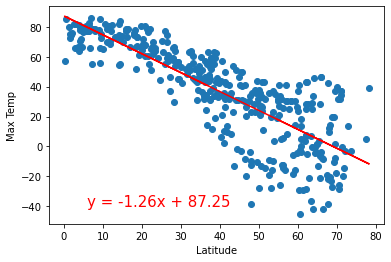

In [34]:
x_values = north_weather['Lat'].astype('float')
y_values = north_weather['Max Temp'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5012581113126724


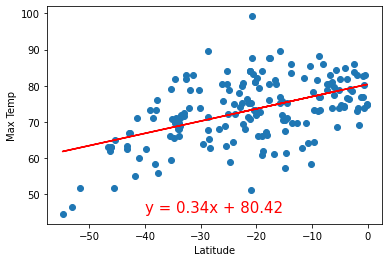

In [37]:
x_values = south_weather['Lat'].astype('float')
y_values = south_weather['Max Temp'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37621580297465024


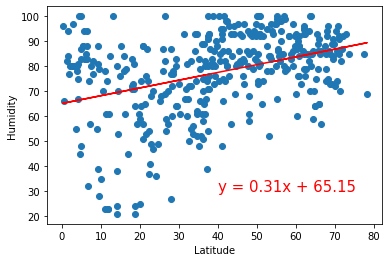

In [39]:
x_values = north_weather['Lat'].astype('float')
y_values = north_weather['Humidity'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39255256339702926


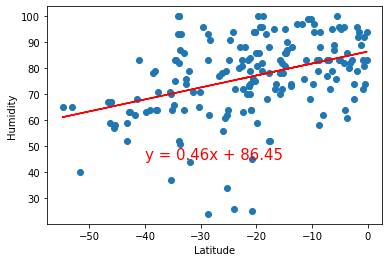

In [40]:
x_values = south_weather['Lat'].astype('float')
y_values = south_weather['Humidity'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3204163127426728


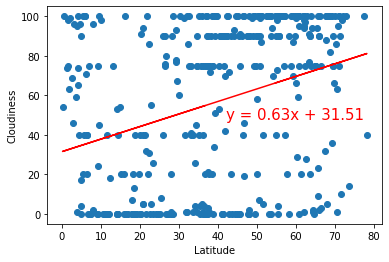

In [43]:
x_values = north_weather['Lat'].astype('float')
y_values = north_weather['Cloudiness'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,48),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3325317990193084


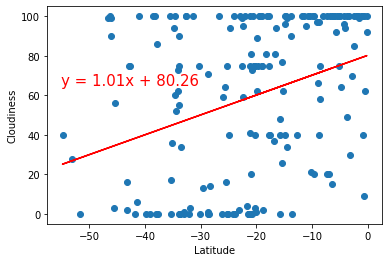

In [45]:
x_values = south_weather['Lat'].astype('float')
y_values = south_weather['Cloudiness'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15552563218017637


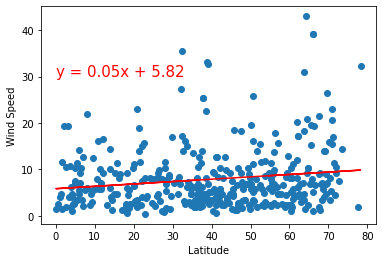

In [47]:
x_values = north_weather['Lat'].astype('float')
y_values = north_weather['Wind Speed'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3764582106944963


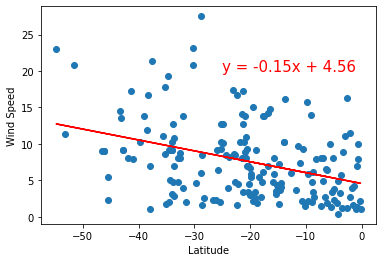

In [49]:
x_values = south_weather['Lat'].astype('float')
y_values = south_weather['Wind Speed'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.show()